In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [6]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # solve for x_value making F(x_value, param) = 0
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1e-7,
                             maxiter=50)
            # record solution and update guess for the next iteration
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's Method fails, return a truncated list of parameters
            # with corresponding x values
            return param_list[:len(X)], X
    return param_list, X



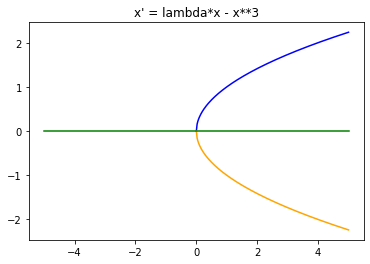

In [21]:
def F(x, lamb): # problem 1: x' = lamb*x - x**3
    return lamb*x - x**3

# Top curve
C1, X1 = EmbeddingAlg(np.linspace(5, 0, 200), np.sqrt(5), F)
# bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, 0, 200), -np.sqrt(5), F)

plt.plot(C1, X1, color='blue')
plt.plot(C2, X2, color='orange')
plt.plot(np.linspace(-5, 5, 200), np.zeros(200), color='green')
plt.title("x' = lambda*x - x**3")
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

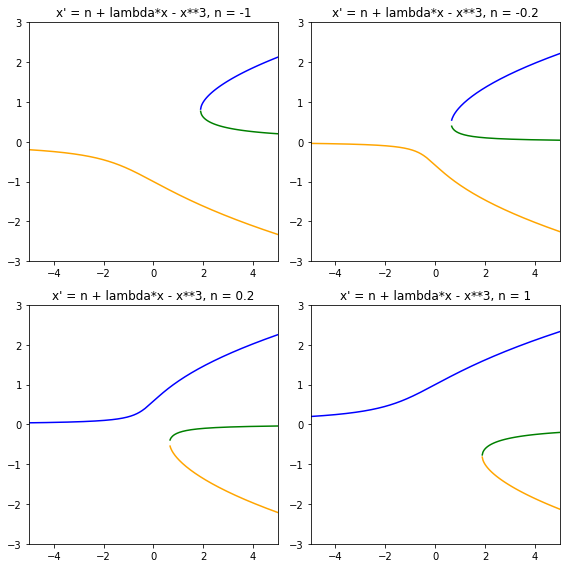

In [34]:
eta = [-1, -.2, .2, 1]

def F(x, lamb): 
    return lamb*x - x**3

# define a function that returns a function, based on eta
def F_eta(n):
    return lambda x, lamb: n + F(x, lamb)


plt.figure(figsize=(8,8))    
# plot all four bifurcation diagrams
for i in range(4):
    n = eta[i]
    plt.subplot(2,2,i+1)

    # Curves
    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 400), np.sqrt(5), F_eta(n))
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 400), -np.sqrt(5), F_eta(n))
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 400), 0.5, F_eta(n))

    plt.plot(C1, X1, color='blue')
    plt.plot(C2, X2, color='orange')
    plt.plot(C3, X3, color='green')
    # plt.plot(np.linspace(-5, 5, 200), n*np.ones(200), color='green')
    plt.title("x' = n + lambda*x - x**3, n = {}".format(n))
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
plt.tight_layout()
plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

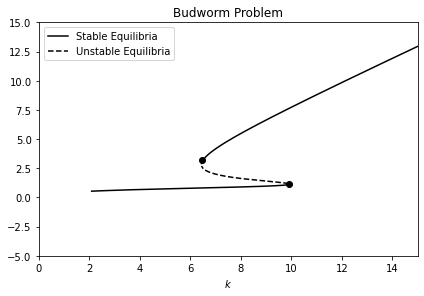

In [83]:
# constant r is given 
r = 0.56 # RA/B

def F(x, k):
    return r*x*(1-x/k) - x**2 / (1+x**2)


# plt.figure(figsize=(8,8))    
# plot all four bifurcation diagrams

# Curves
C1, X1 = EmbeddingAlg(np.linspace(9.9, 2.1, 200), 1.1, F)
C2, X2 = EmbeddingAlg(np.linspace(6.45, 15, 200), 3.2, F)
C3, X3 = EmbeddingAlg(np.linspace(0.1, 15, 200), 0, F)
C4, X4 = EmbeddingAlg(np.linspace(9.9, 6.3, 400), 1.2, F)

# plot curves
plt.plot(C1, X1, color='black', label='Stable Equilibria')
plt.plot(C2, X2, color='black')
# plt.plot(C3, X3, color='black')
plt.plot(C4, X4, linestyle='--', color='black', label='Unstable Equilibria')

# plot markers
plt.plot(9.9, 1.15, marker='o', color='black')
plt.plot(6.45, 3.2, marker='o', color='black')

# formatting
plt.title("Budworm Problem")
plt.xlim(0, 15)
plt.ylim(-5, 15)
plt.tight_layout()
plt.xlabel(r'$k$')
plt.legend(loc='best')
plt.show()